## Creating a composite image from multiple PlanetScope scenes


In this guide, you'll learn how to create a composite image (or mosaic) from multiple PlanetScope scenes that cover an area of interest (AOI). You'll need [GDAL (Geospatial Data Abstraction Library)](http://www.gdal.org/) and its python bindings installed to run the commands below.

First, let's use [Planet Explorer](https://www.planet.com/explorer/) to travel to stunning Yosemite National Park. You can see below that I've drawn an area of interest around [Mount Dana](https://en.wikipedia.org/wiki/Mount_Dana) on the eastern border of Yosemite. I want an image that depicts the mountain on a clear summer day, so I've narrowed my data search in Planet Explorer to scenes with less than 5% cloud cover, captured in July and August 2016. 

![Mount Dana in Planet Explorer](graphics/pe-mtdana.gif)

As you can see in the animated gif above, my search yielded a set of three PlanetScope scenes, all taken on August 20, 2016. Together these scenes cover 100% of my area of interest. As I roll over each item in Planet Explorer, I can see that the scenes' rectangular footprints extend far beyond Mount Dana. All three scenes overlap slightly, and one scene touches only a small section at the bottom of my AOI. Still, they look good to me, so I'm going to submit an order for the visual assets. 

After downloading, moving, and wrangling the data, I'm ready to create a composite image from the three scenes. First, though, I'll use `gdalinfo` to inspect the spatial metadata of the scenes. 

In [ ]:
!gdalinfo raw-data/175322.tif 
!gdalinfo raw-data/175323.tif
!gdalinfo raw-data/175325.tif

The three scenes have the same coordinate systems and the same number of bands, so we can go ahead and use the `gdal_merge.py` utility to stitch them together. In areas of overlap, the utility will copy over parts of the previous image in the list of input files with data from the next image. The `-v` flag in the command below allows us to see the output of the mosaicing operations as they are done. 

In [59]:
!gdal_merge.py -v raw-data/175322.tif raw-data/175323.tif raw-data/175325.tif -o output/mtdana-merged.tif


Processing file     1 of     3,  0.000% completed in 0 minutes.
Filename: raw-data/175322.tif
File Size: 9061x4357x4
Pixel Size: 3.000000 x -3.000000
UL:(289068.000000,4207698.000000)   LR:(316251.000000,4194627.000000)
Copy 0,0,9061,4357 to 1124,0,9061,4357.
Copy 0,0,9061,4357 to 1124,0,9061,4357.
Copy 0,0,9061,4357 to 1124,0,9061,4357.
Copy 0,0,9061,4357 to 1124,0,9061,4357.

Processing file     2 of     3, 33.333% completed in 0 minutes.
Filename: raw-data/175323.tif
File Size: 9058x4356x4
Pixel Size: 3.000000 x -3.000000
UL:(287478.000000,4200501.000000)   LR:(314652.000000,4187433.000000)
Copy 0,0,9058,4356 to 594,2399,9058,4356.
Copy 0,0,9058,4356 to 594,2399,9058,4356.
Copy 0,0,9058,4356 to 594,2399,9058,4356.
Copy 0,0,9058,4356 to 594,2399,9058,4356.

Processing file     3 of     3, 66.667% completed in 0 minutes.
Filename: raw-data/175325.tif
File Size: 9053x4349x4
Pixel Size: 3.000000 x -3.000000
UL:(285696.000000,4193316.000000)   LR:(312855.000000,4180269.000000)
Copy 0,0,

We can see in the verbose output above that the mosaicing operation is fairly simple: the utility script is basically copying a range of pixels for each band in each scene over to the designated output file. We can use `gdalinfo` to inspect the metadata of the merged raster file we created.

In [ ]:
!gdalinfo output/mtdana-merged.tif

The merged raster is a large GeoTiff file, so we're going use `gdal_translate`, another GDAL utility, to convert it to a PNG and set the output image to a percentage of the original. That will make it easier for us to view in this notebook. 

In [48]:
!gdal_translate -of "PNG" -outsize 10% 0% output/mtdana-merged.tif output/mtdana-merged.png

Input file size is 10185, 9143
0...10...20...30...40...50...60...70...80...90...100 - done.


Now let's view the merged image.

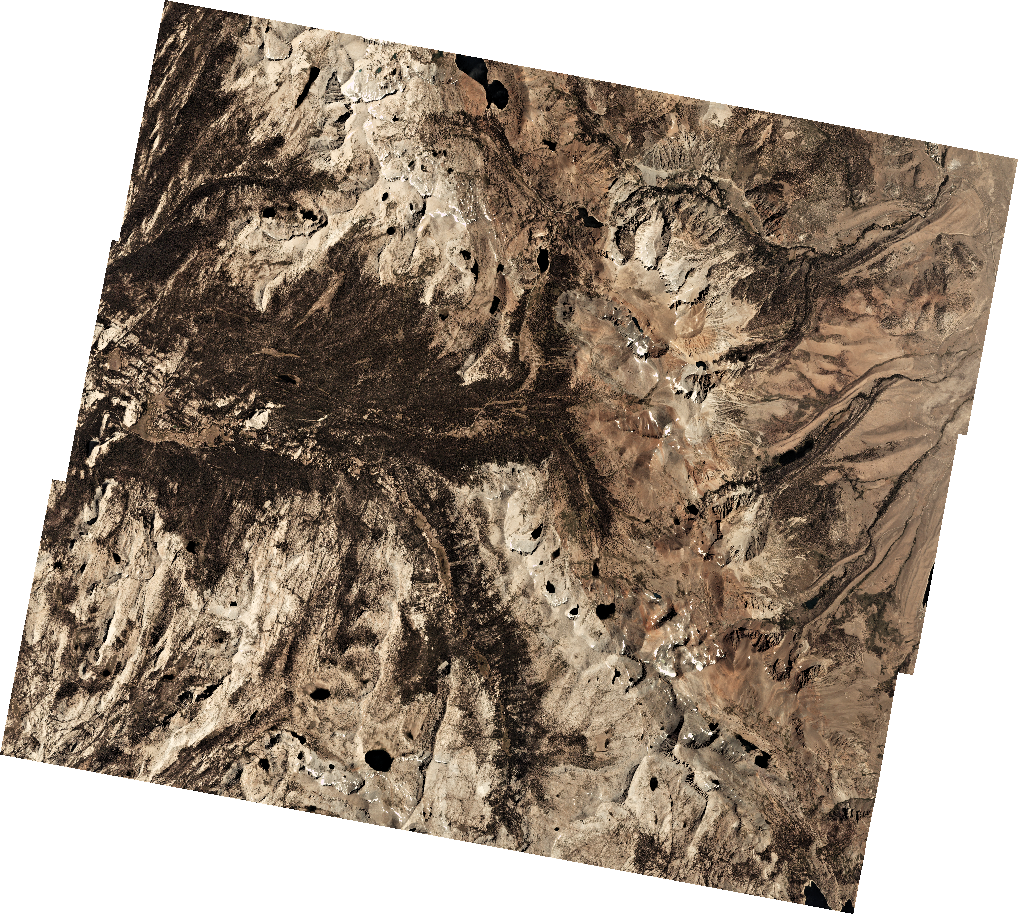

In [49]:
from IPython.display import Image
Image(filename="output/mtdana-merged.png")

Success! Wait... this is definitely a composite image from our three PlanetScope scenes, but it's not really what we want. We'd much rather have a composite image that is cropped to the boundaries of our AOI. We can use `gdalwarp` to clip the raster to our area of interest (defined by a `geojson` file). 

In [53]:
!gdalwarp -of GTiff -cutline raw-data/mt-dana-small.geojson -crop_to_cutline output/mtdana-merged.tif output/mtdana-cropped.tif

Creating output file that is 4177P x 4709L.
Processing input file output/mtdana-merged.tif.
Using band 4 of source image as alpha.
Using band 4 of destination image as alpha.
0...10...20...30...40...50...60...70...80...90...100 - done.


Again, we'll use `gdal_translate` to convert the GeoTiff to a smaller PNG so that it's easier to view the cropped image.

In [54]:
!gdal_translate -of "PNG" -outsize 10% 0% output/mtdana-cropped.tif output/mtdana-cropped.png

Input file size is 4177, 4709
0...10...20...30...40...50...60...70...80...90...100 - done.


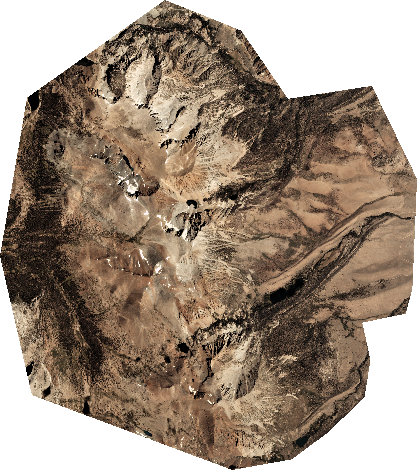

In [55]:
from IPython.display import Image
Image(filename="output/mtdana-cropped.png")

Success! A cropped, composite image of Mount Dana in Yosemite! [Who wants to go for a hike?](https://www.alltrails.com/trail/us/california/mount-dana-summit-trail)